In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


We want to find what features are going to affect if netflix will list a title in their listings. The first thing I did was read in my data. We need to perform some data exploration and cleansing before diving into the analysis.

In [2]:
netflix_listings = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix_listings.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


This dataset needs a lot of cleansing first to be able to visualize and explore the data. Moreover, each column has a lot of different work needed to clean up the data. Thus, I decided to look at individual columns at a time to see what we can observe, The first thing I wanted to compare is the ratio of movies to television shows. Here I created a bar chart that uses Seaborn to plot a bar chart. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type')

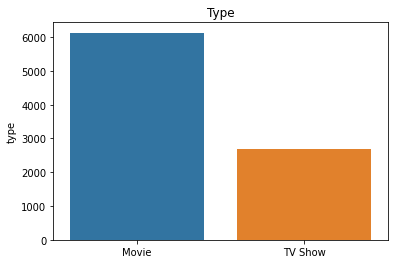

In [3]:
sns.barplot(netflix_listings["type"].value_counts().index,netflix_listings["type"].value_counts()).set_title("Type")

In [4]:
movies = netflix_listings[netflix_listings["type"] == "Movie"]
shows = netflix_listings[netflix_listings["type"] == "TV Show"]

In [5]:
print(list(movies['rating'].value_counts().index))
print(list(shows['rating'].value_counts().index))

['TV-MA', 'TV-14', 'R', 'TV-PG', 'PG-13', 'PG', 'TV-Y7', 'TV-Y', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min']
['TV-MA', 'TV-14', 'TV-PG', 'TV-Y7', 'TV-Y', 'TV-G', 'NR', 'R', 'TV-Y7-FV']


Now we can see there is some entires that aren't correctly inputted in our movies category. There should not be minutes in the rating column. Now we try to find and get rid of those unreliable data entries.

In [6]:
movies = movies[(movies["rating"] != "74 min") & (movies["rating"] != "84 min") & (movies["rating"] != "66 min")]
list(movies['rating'].value_counts().index)

['TV-MA',
 'TV-14',
 'R',
 'TV-PG',
 'PG-13',
 'PG',
 'TV-Y7',
 'TV-Y',
 'TV-G',
 'NR',
 'G',
 'TV-Y7-FV',
 'NC-17',
 'UR']

Now we want to take a look of the distribution of the movies and shows by their rating.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'rating')

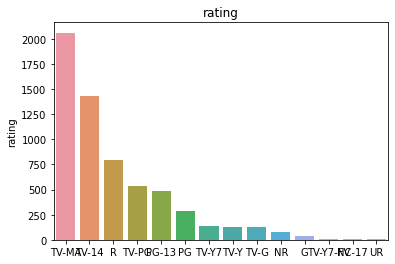

In [7]:
sns.barplot(movies["rating"].value_counts().index,movies["rating"].value_counts()).set_title("rating")

We can see that most are TV-MA or TV-14. Let's see if there is the same trend with shows.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'rating')

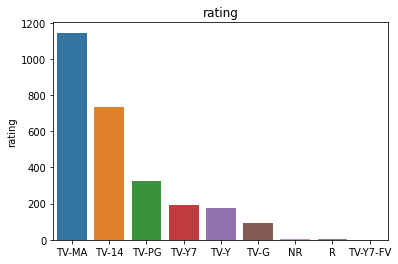

In [8]:
sns.barplot(shows["rating"].value_counts().index, shows["rating"].value_counts()).set_title("rating")

We see that the top two categories for both are TV-MA and TV-14. Now we are gonna test if this is significant difference for TV-MA titles.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'rating')

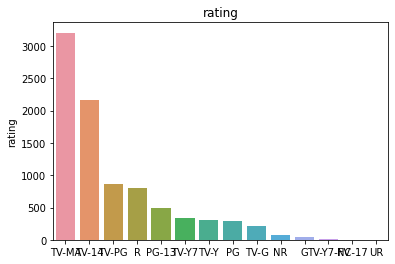

In [9]:
#remove unreliable data from original data set
netflix_listings = netflix_listings[(netflix_listings["rating"] != "74 min") & (netflix_listings["rating"] != "84 min") & (netflix_listings["rating"] != "66 min")]

sns.barplot(netflix_listings["rating"].value_counts().index, netflix_listings["rating"].value_counts(), errcolor = "red").set_title("rating")

Our null hypothesis will be that all the ratings are equally distributed in our listings. Our alternate hypothesis will be that the distribution of the ratings is not equal.

In [10]:
import scipy
num_of_ratings = len(netflix_listings['rating'].value_counts().index)
num_of_tvma = len(netflix_listings[netflix_listings["rating"] == "TV-MA"])
num_of_rows = len(netflix_listings)
expected_stat = num_of_rows/num_of_ratings
observed_stat = num_of_tvma

print(observed_stat, expected_stat)

3207 628.8571428571429


In [11]:
observed_stats = []
num_of_rows = len(netflix_listings)
for i in (netflix_listings['rating'].value_counts().index):
    num_of_rating = len(netflix_listings[netflix_listings["rating"] == i])
    observed_stats.append(num_of_rating)
scipy.stats.chisquare(observed_stats)

Power_divergenceResult(statistic=18115.680909090916, pvalue=0.0)

Here we see a p-value of 0 which is much less than 0.5 so our observation is extremely significant and we can assume our alternate hypothesis to be true. We can assume that rating has some affect on if a title will be listed in Netflix.

The last thing I wanted to test while looking at ratings is what 


The next thing I looked at (format date and test 5% pvalue and what years would be best that sort of thing)

Then look at genres for listen in (break up the lists and look at top categories)